In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


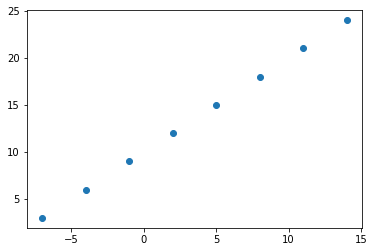

In [3]:
# Creating data to view and fit

import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

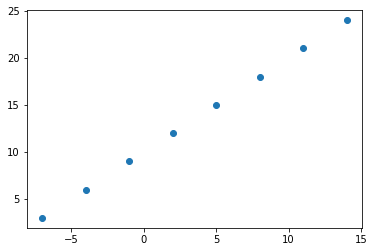

In [4]:
# Using Tensors

import numpy as np
import matplotlib.pyplot as plt

x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x, y)

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 628ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
model.predict([17.0])

1/1 [==============================] - 0s 58ms/step


array([[12.716021]], dtype=float32)

#HyperParameter Tuning

In [11]:
# Training the model for longer
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(x, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 363ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s

In [12]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 36ms/step


array([[30.158512]], dtype=float32)

#Lets visualize the model

In [15]:
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [16]:
y =np.arange(-80, 100, 4)
y

array([-80, -76, -72, -68, -64, -60, -56, -52, -48, -44, -40, -36, -32,
       -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,  12,  16,  20,
        24,  28,  32,  36,  40,  44,  48,  52,  56,  60,  64,  68,  72,
        76,  80,  84,  88,  92,  96])

In [18]:
y = X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [20]:
len(X)

50

In [35]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [36]:
len(X_train) , len(y_train)

(40, 40)

In [32]:
len(y_test)

10

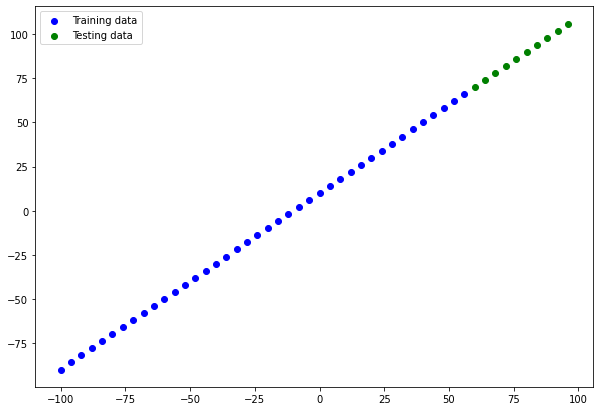

In [37]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c='b', label = 'Training data')

plt.scatter(X_test, y_test, c='g', label='Testing data')

plt.legend();

In [97]:
# Creating the same model with input shape 1

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [98]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

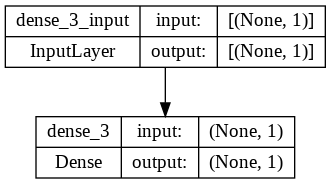

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [42]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 34ms/step


In [43]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [68]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

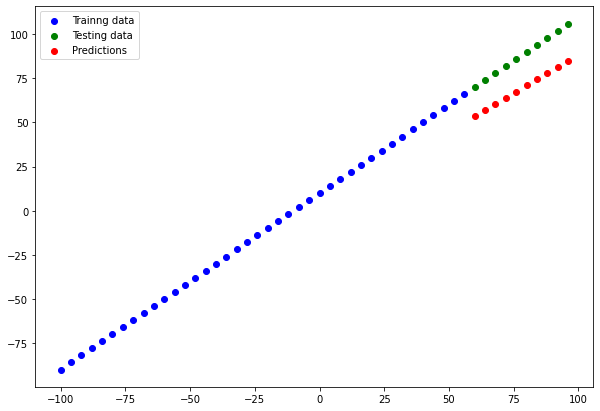

In [47]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [48]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 163ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [50]:
mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [52]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [53]:
y_preds.squeeze()

array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
       74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)

In [55]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred = y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [56]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [71]:
def mae(y_test , y_pred):
  return tf.metrics.mean_absolute_error(y_test , y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

Get more data - get more examples for your model to train on (more opportunities to learn patterns).
Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.

In [62]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 14ms/step


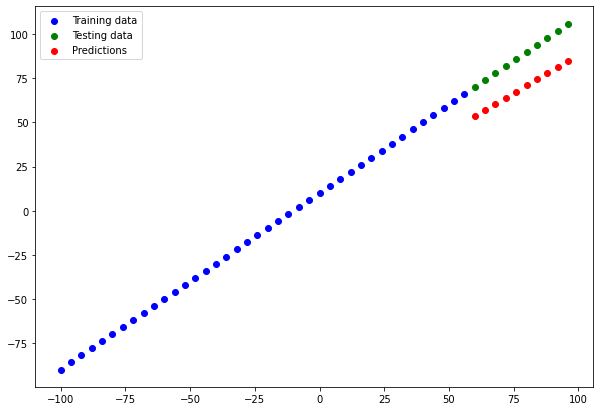

In [69]:
# Make and plot predictions for model_1
y_preds_1 = model1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [72]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

In [74]:
#Building model2 adding an extra layer
tf.random.set_seed(42)

model2 =tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

model2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose=0)

1/1 [==============================] - 0s 15ms/step


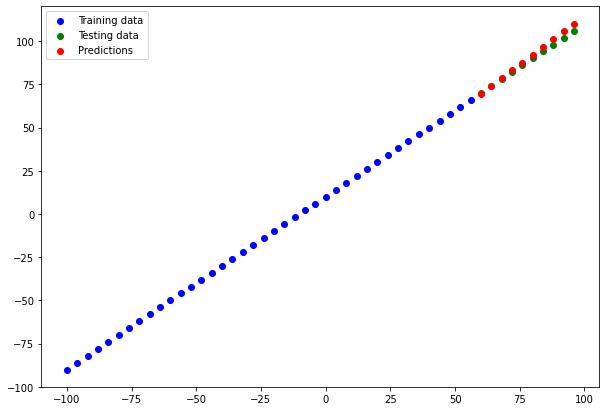

In [77]:
y_pred2 = model2.predict(X_test)

plot_predictions(predictions=y_pred2)

In [79]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_pred2.squeeze()).numpy()
mse_2 = mse(y_test, y_pred2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

In [80]:
model_results = [["model1", mae_1, mse_1],
                 ["model2", mae_2, mse_2]]

In [81]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["models", "mae", "mse"])
all_results

,models,mae,mse
0,model1,18.745327,353.573364
1,model2,1.909733,5.458770


In [83]:
model2.save('bestmodel_format')

In [84]:
model2.save('bestmodel1_HDF5_format.h5')

In [87]:
!ls bestmodel1_HDF5_format.h5

bestmodel1_HDF5_format.h5


In [88]:
loaded_saved_model = tf.keras.models.load_model("bestmodel1_HDF5_format.h5")
loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [92]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(2)
])

model3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

